<a href="https://colab.research.google.com/github/shreyawalia/ai-powered-file-management/blob/main/Model%20Creation/sdg_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy import array
import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/My Drive/sdg.csv')

In [ ]:
df.head()

,Unnamed: 0,description,goal_1,goal_2,goal_3,goal_4,goal_5,goal_6,goal_7,goal_8,goal_9,goal_10,goal_11,goal_12,goal_13,goal_14,goal_15,goal_16,goal_17
0,0,Description\nBackground:\nIn order to achieve ...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,Description/achievement of initiative\nDesa Wi...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,2,Description\nThe overall objective of this pro...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,3,Description\nThe Global Goals Jam is a two day...,0,0,1,1,0,0,0,0,0,1,1,0,1,1,1,0,1
4,4,Description/achievement of initiative\nNewport...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.drop('Unnamed: 0', axis = 1, inplace = True )

In [ ]:
df.head()

,description,goal_1,goal_2,goal_3,goal_4,goal_5,goal_6,goal_7,goal_8,goal_9,goal_10,goal_11,goal_12,goal_13,goal_14,goal_15,goal_16,goal_17
0,Description\nBackground:\nIn order to achieve ...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,Description/achievement of initiative\nDesa Wi...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,Description\nThe overall objective of this pro...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,Description\nThe Global Goals Jam is a two day...,0,0,1,1,0,0,0,0,0,1,1,0,1,1,1,0,1
4,Description/achievement of initiative\nNewport...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df['description'].nunique()

1934

In [ ]:
j=0
pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
df_grouped = df.groupby(['description'], sort=False).sum()

In [ ]:
df_grouped.info

<bound method DataFrame.info of                                                     goal_1  ...  goal_17
description                                                 ...         
Description\nBackground:\nIn order to achieve t...       1  ...        1
Description/achievement of initiative\nDesa Wis...       0  ...        0
Description\nThe overall objective of this proj...       0  ...        0
Description\nThe Global Goals Jam is a two day ...       0  ...        1
Description/achievement of initiative\nNewport ...       0  ...        0
...                                                    ...  ...      ...
Description/achievement of initiative\nThis ini...       0  ...        0
Description\nAdvance the knowledge on Sustainab...       0  ...        1
Description/achievement of initiative\nThe Colo...       1  ...        0
Description\nThe Sustainable Development Goals ...       0  ...        0
Description\nSummary: To strengthen the rule of...       0  ...        0

[1934 rows x 17 co

In [ ]:
df_new = df_grouped.reset_index()

In [ ]:
df_new.head()

,description,goal_1,goal_2,goal_3,goal_4,goal_5,goal_6,goal_7,goal_8,goal_9,goal_10,goal_11,goal_12,goal_13,goal_14,goal_15,goal_16,goal_17
0,Description\nBackground:\nIn order to achieve ...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,Description/achievement of initiative\nDesa Wi...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,Description\nThe overall objective of this pro...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,Description\nThe Global Goals Jam is a two day...,0,0,1,1,0,0,0,0,0,1,1,0,1,1,1,0,1
4,Description/achievement of initiative\nNewport...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_new.iloc[0][1]

1

In [ ]:
df.columns[3]

'goal_3'

In [ ]:
df_new.info

<bound method DataFrame.info of                                             description  ...  goal_17
0     Description\nBackground:\nIn order to achieve ...  ...        1
1     Description/achievement of initiative\nDesa Wi...  ...        0
2     Description\nThe overall objective of this pro...  ...        0
3     Description\nThe Global Goals Jam is a two day...  ...        1
4     Description/achievement of initiative\nNewport...  ...        0
...                                                 ...  ...      ...
1929  Description/achievement of initiative\nThis in...  ...        0
1930  Description\nAdvance the knowledge on Sustaina...  ...        1
1931  Description/achievement of initiative\nThe Col...  ...        0
1932  Description\nThe Sustainable Development Goals...  ...        0
1933  Description\nSummary: To strengthen the rule o...  ...        0

[1934 rows x 18 columns]>

In [ ]:
df_new.head()

,description,goal_1,goal_2,goal_3,goal_4,goal_5,goal_6,goal_7,goal_8,goal_9,goal_10,goal_11,goal_12,goal_13,goal_14,goal_15,goal_16,goal_17
0,Description\nBackground:\nIn order to achieve ...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,Description/achievement of initiative\nDesa Wi...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,Description\nThe overall objective of this pro...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,Description\nThe Global Goals Jam is a two day...,0,0,1,1,0,0,0,0,0,1,1,0,1,1,1,0,1
4,Description/achievement of initiative\nNewport...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# df_new.to_excel('/content/drive/My Drive/sdgfiles.xlsx', engine='xlsxwriter')

In [ ]:
#df_new.to_csv('/content/drive/My Drive/sdg.csv')

In [ ]:
import seaborn as sns

In [ ]:
categories = list(df_new.columns.values)

categories = categories[1:]
print(categories)


['goal_1', 'goal_2', 'goal_3', 'goal_4', 'goal_5', 'goal_6', 'goal_7', 'goal_8', 'goal_9', 'goal_10', 'goal_11', 'goal_12', 'goal_13', 'goal_14', 'goal_15', 'goal_16', 'goal_17']


In [ ]:

counts = []
for category in categories:
    counts.append((category, df_new[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of projects'])
df_stats

,category,number of projects
0,goal_1,551
1,goal_2,443
2,goal_3,489
3,goal_4,700
4,goal_5,557
5,goal_6,398
6,goal_7,420
7,goal_8,607
8,goal_9,352
9,goal_10,380


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

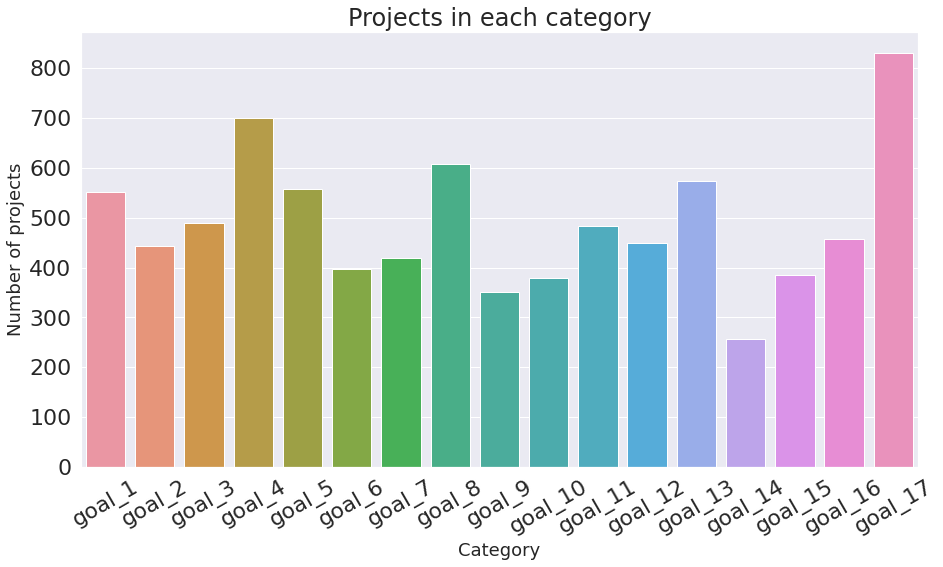

In [ ]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax= sns.barplot(categories, df_new.iloc[:,1:].sum().values)
plt.title("Projects in each category", fontsize=24)
plt.ylabel('Number of projects', fontsize=18)
plt.xlabel('Category', fontsize=18)
plt.xticks(rotation = 30)
#adding the text labels
# rects = ax.patches
# labels = df_new.iloc[:,1:].sum().values
# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
#plt.show()

In [ ]:
rowSums = df_new.iloc[:,1:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()

multiLabel_counts = multiLabel_counts.iloc[0:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Projects having multiple labels", fontsize=24)
plt.ylabel('Number of projects', fontsize=18)
plt.xlabel('Goals a project satisfied', fontsize=18)
plt.xticks(rotation = 30)

NameError: ignored

**Data Preprocessing** 

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
data = df_new
#data = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
data.shape

(1938, 18)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [ ]:

data['description'] = data['description'].str.lower()
data['description'] = data['description'].apply(cleanHtml)
data['description'] = data['description'].apply(cleanPunc)
data['description'] = data['description'].apply(keepAlpha)
data.head()

,description,goal_1,goal_2,goal_3,goal_4,goal_5,goal_6,goal_7,goal_8,goal_9,goal_10,goal_11,goal_12,goal_13,goal_14,goal_15,goal_16,goal_17
0,description background in order to achieve th...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,description achievement of initiative desa wis...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,description the overall objective of this proj...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,description the global goals jam is a two day ...,0,0,1,1,0,0,0,0,0,1,1,0,1,1,1,0,1
4,description achievement of initiative newport ...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within', 'description', 'background', 'objective', 'overall', ' achievement'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['description'] = data['description'].apply(removeStopWords)
data.head()

,description,goal_1,goal_2,goal_3,goal_4,goal_5,goal_6,goal_7,goal_8,goal_9,goal_10,goal_11,goal_12,goal_13,goal_14,goal_15,goal_16,goal_17
0,order achieve sustainable development go...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,achievement initiative desa wisata lestari i...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,project promote ecological transition...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,global goals jam day event creative team...,0,0,1,1,0,0,0,0,0,1,1,0,1,1,1,0,1
4,achievement initiative newport university pr...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['description'] = data['description'].apply(stemming)
data.head()

,description,goal_1,goal_2,goal_3,goal_4,goal_5,goal_6,goal_7,goal_8,goal_9,goal_10,goal_11,goal_12,goal_13,goal_14,goal_15,goal_16,goal_17
0,order achiev sustain develop goal sdgs various...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,achiev initi desa wisata lestari igirmranak ta...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,project promot ecolog transit transform challe...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,global goal jam day event creativ team work to...,0,0,1,1,0,0,0,0,0,1,1,0,1,1,1,0,1
4,achiev initi newport univers provid tuition fr...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


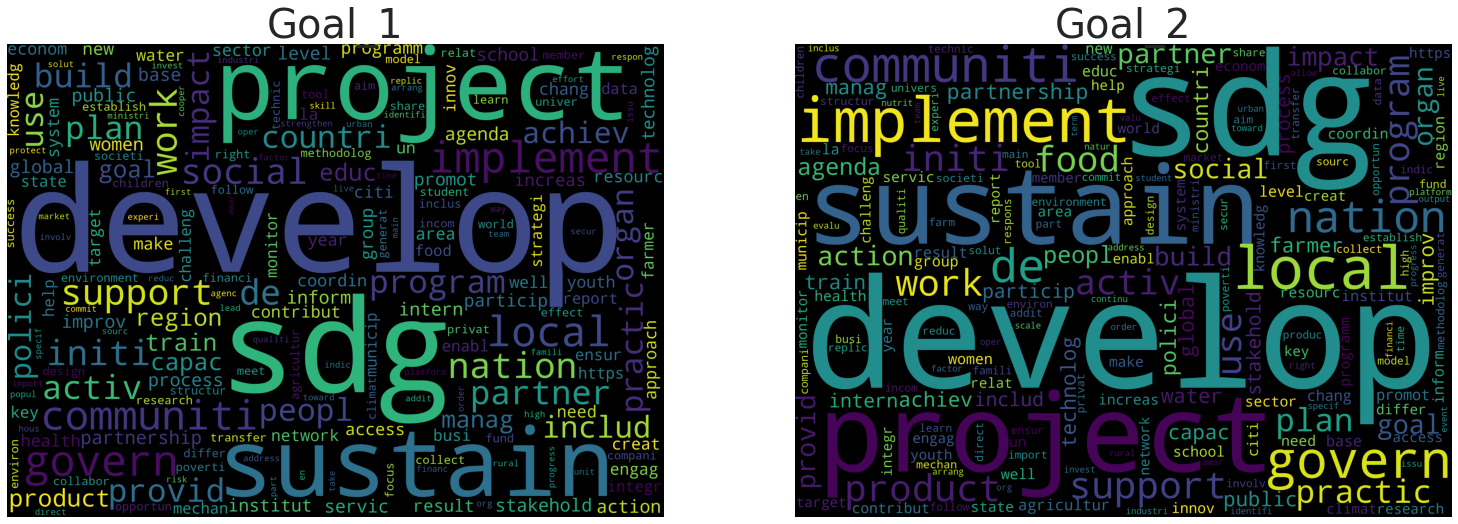

In [ ]:

plt.figure(figsize=(40,25))

# goal_1
subset = df_new[df_new.goal_1==1]
text = subset.description.values
goal_1_cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Goal_1",fontsize=40)
plt.imshow(goal_1_cloud)


# goal_2
subset = df_new[df_new.goal_2==1]
text = subset.description.values
goal_2_cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("Goal_2",fontsize=40)
plt.imshow(goal_2_cloud)

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(1356, 18)
(582, 18)


In [ ]:
train_text = train['description']
test_text = test['description']  #test data from the train as validation 

In [ ]:
train_text.head()

1375    introduct ekoenergi worldwid non profit ecolab...
938     achiev initi ggkp global partnership intern or...
493     achiev initi reduc landfil mass divert materi ...
1273    wakanda wiki learn experi diffus african innov...
277     achiev initi unit nation collabor programm red...
Name: description, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents='unicode',
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['description'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['description'], axis=1)

In [ ]:
print(x_train.shape)
print("="*20)
print(x_test.shape)
print("="*20)

(1356, 417632)
(582, 417632)


In [ ]:
print(x_train)

  (0, 417156)	0.010174334739513291
  (0, 417149)	0.019274071384956837
  (0, 416152)	0.015352160258186722
  (0, 416086)	0.01545949363143066
  (0, 415963)	0.013297537738477076
  (0, 415631)	0.022462458747200455
  (0, 415619)	0.025650846109444073
  (0, 415553)	0.014419616735843844
  (0, 415468)	0.011231229373600228
  (0, 415400)	0.013244750842419899
  (0, 415330)	0.010718013638955214
  (0, 415281)	0.013244750842419899
  (0, 415127)	0.030704320516373444
  (0, 414659)	0.015352160258186722
  (0, 414658)	0.07173857244361272
  (0, 414383)	0.010174334739513291
  (0, 414382)	0.010174334739513291
  (0, 413926)	0.031218057673503864
  (0, 413486)	0.015352160258186722
  (0, 413459)	0.010718013638955214
  (0, 413306)	0.013245561246065303
  (0, 413140)	0.02556119735943345
  (0, 412981)	0.013244750842419899
  (0, 412980)	0.013244750842419899
  (0, 412871)	0.015352160258186722
  :	:
  (1355, 44804)	0.01658489883902238
  (1355, 44762)	0.015262880740813035
  (1355, 44283)	0.04802091576820975
  (1355, 4179

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])


predictions = []
accuracy_list = []
for category in categories:
    print('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    accuracy = accuracy_score(test[category], prediction)
    predictions.append(prediction)
    accuracy_list.append(accuracy)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")

**Processing goal_1 comments...**
Test accuracy is 0.6958762886597938


**Processing goal_2 comments...**
Test accuracy is 0.7783505154639175


**Processing goal_3 comments...**
Test accuracy is 0.7577319587628866


**Processing goal_4 comments...**
Test accuracy is 0.6563573883161512


**Processing goal_5 comments...**
Test accuracy is 0.6941580756013745


**Processing goal_6 comments...**
Test accuracy is 0.8075601374570447


**Processing goal_7 comments...**
Test accuracy is 0.802405498281787


**Processing goal_8 comments...**
Test accuracy is 0.7079037800687286


**Processing goal_9 comments...**
Test accuracy is 0.8230240549828178


**Processing goal_10 comments...**
Test accuracy is 0.8006872852233677


**Processing goal_11 comments...**
Test accuracy is 0.7474226804123711


**Processing goal_12 comments...**
Test accuracy is 0.7577319587628866


**Processing goal_13 comments...**
Test accuracy is 0.7164948453608248


**Processing goal_14 comments...**
Test accuracy is 0.8676975

In [ ]:
predictions

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 